**Table of contents**<a id='toc0_'></a>    
- [Introduction](#toc1_1_)    
    - [Problem Statement](#toc1_1_1_)    
    - [Goals and Objectives](#toc1_1_2_)    
    - [Importance of the Project](#toc1_1_3_)    
  - [Data Exploration](#toc1_2_)    
    - [Feature Description](#toc1_2_1_)    
    - [Importing Libraries](#toc1_2_2_)    
    - [Loading Dataset](#toc1_2_3_)    
    - [Data Types and Summary Statistics](#toc1_2_4_)    
    - [Identifying Target Variable](#toc1_2_5_)    
  - [Data Cleaning](#toc1_3_)    
    - [Handling Missing Values](#toc1_3_1_)    
    - [Handling Duplicate Values](#toc1_3_2_)    
    - [Outlier Detection and Treatment](#toc1_3_3_)    
  - [Feature Engineering](#toc1_4_)    
    - [Handling Categorical Variables](#toc1_4_1_)    
  - [Exploratory Data Analysis (EDA)](#toc1_5_)    
    - [Univariate Analysis](#toc1_5_1_)    
      - [Histogram](#toc1_5_1_1_)    
      - [Box Plot](#toc1_5_1_2_)    
    - [Bivariate Analysis](#toc1_5_2_)    
      - [Count Plot ( categorical features vs Heart Disease)](#toc1_5_2_1_)    
      - [Count Plot (categorical features vs Sex(Male/Female)](#toc1_5_2_2_)    
    - [Multivariate Analysis](#toc1_5_3_)    
      - [Correlation Matrix, Heatmaps](#toc1_5_3_1_)    
  - [Model Training and Evaluation](#toc1_6_)    
    - [Splitting Data into Training and Testing Sets](#toc1_6_1_)    
    - [Base model](#toc1_6_2_)    
    - [Hyperparameters Tuning](#toc1_6_3_)    
    - [ Evaluating Model Performance on Test Data](#toc1_6_4_)    
  - [Feature Engineering](#toc1_7_)    
    - [Feature selection using Logistic regression](#toc1_7_1_)    
    - [Recursive feature elimination (RFE) to find important features](#toc1_7_2_)    
    - [Model building with new selected feature](#toc1_7_3_)    
      - [Feature selected from model coefficent](#toc1_7_3_1_)    
      - [Feature selected from Recursive feature elimination](#toc1_7_3_2_)    
  - [Final Model Selection](#toc1_8_)    
  - [Saving and Loading Model](#toc1_9_)    
  - [Conclusion & Impact](#toc1_10_)    
    - [Recommendation for Doctors](#toc1_10_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Introduction](#toc0_)
The dataset is taken from kaggle "https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction"
### <a id='toc1_1_1_'></a>[Problem Statement](#toc0_)
The leading cause of death in the developed world is heart disease. Therefore there needs to be work done to help prevent the risks of of having a heart attack or stroke.Use this dataset to predict which patients are most likely to suffer from a heart disease in the near future using the features given.
### <a id='toc1_1_2_'></a>[Goals and Objectives](#toc0_)
- The goal here is to creata a machine learning model to find the heart disease based on the datas given.
- Then deploy the model in a website for easier access for the users.
### <a id='toc1_1_3_'></a>[Importance of the Project](#toc0_)
This project will help doctors to make sure whether the patient have heart disease or not.It can play a crucile role in saving people life.

## <a id='toc1_2_'></a>[Data Exploration](#toc0_)
### <a id='toc1_2_1_'></a>[Feature Description](#toc0_)

- Age (from 29 - 77) - Age of the patients 
- Sex (1 or 0) - Whether the patient is male or female 
- Chest pain type (ranges from 1 - 4) - four types of chest pain they are angina, Atypical angina, Non-anginal pain, Asymptomatic pain 
- BP (range from 94 - 200) - It indicates the Blood Pressure of Patients 
- Cholesterol (range from 126 - 564) - It indicates the colesterol level of patients 
- FBS over 120 (either 1 or 0) - fasting blood sugar larger than 120 mg/dl is considered as prediabetes
- EKG results (0 - 2) - An electrocardiogram (ECG or EKG) is a test to record the electrical signals in the heart. It shows how the heart is beating. An individual receives a score of 0, 1, or 2 ( normal EKG	, abnormal EKG but without certain elements typical of ACS	,abnormal EKG with substantial deviations)
- Max HR (ranges from 71 - 202) - It is the highest number of beats per minute your heart can pump under maximum stress
- Exercise angina (either 0 or 1) - Exercise angina is chest pain or discomfort that occurs during physical activity when the heart muscle doesn't receive enough blood and oxygen
- ST depression	(0 to 6.2) -It is an electrocardiogram (ECG) finding that indicates an abnormally low ST segment, the line between the "S" and "T" waves on the ECG
- Slope of ST (0 - 2) - It is the shift in the ST segment relative to increases in heart rate during exercise (Value 0: upsloping, Value 1: flat, Value 2: downsloping)
- Number of vessels fluro(from 0-3)- Number of major vessels colored by fluoroscopy
- Thallium(either 3 or 7 or 6) - is a radioactive tracer used in nuclear medicine scans to assess how well blood flows through the heart.value 3 = normal, value 6 = reversible defect and value 7 = fixed defect 
- Heart Disease(Prescence or Absence) - Whether heart disease is present or not.

### <a id='toc1_2_2_'></a>[Importing Libraries](#toc0_)

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import joblib
import json
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_auc_score, f1_score, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix


# Increase display options for better visibility
pd.set_option('display.max_colwidth', None)

### <a id='toc1_2_3_'></a>[Loading Dataset](#toc0_)

In [ ]:
df = pd.read_csv('/Users/akashvs/Documents/datasets/Heart_Disease_prediction.csv')
df

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


### <a id='toc1_2_4_'></a>[Data Types and Summary Statistics](#toc0_)

In [ ]:
df.shape

(270, 14)

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [403]:
df.describe(include='all')

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Absence
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,NaN
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,NaN
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,NaN
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,NaN
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,NaN
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,NaN


In [404]:
def unique_values(col):
    print(f'Number of unique values of {col.upper()} -----> {df[col].nunique()}')
    print(f'List of unique values = {df[col].unique()}')
    print('----------------------------------------------------------------')


cols = df.columns
for i in cols:
    unique_values(i)

Number of unique values of AGE -----> 41
List of unique values = [70 67 57 64 74 65 56 59 60 63 53 44 61 71 46 40 48 43 47 54 51 58 66 37
 50 42 62 49 52 45 41 76 39 35 55 34 38 69 68 77 29]
----------------------------------------------------------------
Number of unique values of SEX -----> 2
List of unique values = [1 0]
----------------------------------------------------------------
Number of unique values of CHEST PAIN TYPE -----> 4
List of unique values = [4 3 2 1]
----------------------------------------------------------------
Number of unique values of BP -----> 47
List of unique values = [130 115 124 128 120 110 140 150 135 142 134 112 132 138 160 170 144 122
 152 101 126 118 136 105 174 145 108 156 106 104  94 146 148 178 125 100
 165 180 158 200 117 192 123 129 102 155 172]
----------------------------------------------------------------
Number of unique values of CHOLESTEROL -----> 144
List of unique values = [322 564 261 263 269 177 256 239 293 407 234 226 235 303 149 31

In [405]:
df.nunique(dropna=False)

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

It seems there are 5 - numerical and 9 - categorical columns.

### <a id='toc1_2_5_'></a>[Identifying Target Variable](#toc0_)

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


'Heart Disease' column is the target variable as it is shows whether the patient has heart disease or not.

## <a id='toc1_3_'></a>[Data Cleaning](#toc0_)
### <a id='toc1_3_1_'></a>[Handling Missing Values](#toc0_)

In [ ]:
df.isnull().sum()/len(df)*100

Age                        0.0
Sex                        0.0
Chest pain type            0.0
BP                         0.0
Cholesterol                0.0
FBS over 120               0.0
EKG results                0.0
Max HR                     0.0
Exercise angina            0.0
ST depression              0.0
Slope of ST                0.0
Number of vessels fluro    0.0
Thallium                   0.0
Heart Disease              0.0
dtype: float64

There is no missing value found in the dataset

### <a id='toc1_3_2_'></a>[Handling Duplicate Values](#toc0_)

In [ ]:
df[df.duplicated()]

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease


There is no duplicated values in the dataframe

### <a id='toc1_3_3_'></a>[Outlier Detection and Treatment](#toc0_)

In [ ]:
num_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
cat_cols = ['Sex', 'Chest pain type', 'FBS over 120','EKG results', 'Exercise angina','Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']

# Dictionary to store the percentage of outliers
outlier_percentages = {}
actual_outliers = {}

for col in num_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)

    # Outliers
    actual_outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    # Calculate percentage of outliers
    outlier_percentage = (outlier_count / len(df)) * 100
    outlier_percentages[col] = outlier_percentage

# Print the percentage of outliers for each column
for col, percentage in outlier_percentages.items():
    print(f"Percentage of outliers in {col}: {percentage:.2f}%") 
    print(actual_outliers[col])
    print("\n")

Percentage of outliers in Age: 0.00%
Series([], Name: Age, dtype: int64)


Percentage of outliers in BP: 3.33%
58     174
87     178
110    180
117    200
144    192
159    178
165    180
240    180
265    172
Name: BP, dtype: int64


Percentage of outliers in Cholesterol: 1.85%
1      564
9      407
52     417
181    409
188    394
Name: Cholesterol, dtype: int64


Percentage of outliers in Max HR: 0.37%
101    71
Name: Max HR, dtype: int64


Percentage of outliers in ST depression: 1.48%
87     4.2
156    5.6
176    4.2
235    6.2
Name: ST depression, dtype: float64




- Age - no outlier found
- BP - High blood pressure levels naturally vary and could be high for some individuals
- Cholesterol - It is valid as there are several cases of people having high cholesterol level (240 mg/dl or above)
- Max HR - While 72 bpm may be considered low for maximum heart rate, it is within the range of normal resting heart rates. This value could reflect a specific circumstance (e.g., the individual had a lower exertion level during measurement), retaining it can enhance model’s ability to handle diverse real-world scenarios.
- ST depression - Some individuals may show high ST depression without heart disease due to factors like medications, unique physiology, or fitness levels. ST depression alone doesn’t diagnose heart disease; it’s just one factor among many, so high readings don’t always mean disease is present.

Since all the outlier present in data is very minimum and we also checked the outler values it is fine to work without removing outlier 

## <a id='toc1_4_'></a>[Feature Engineering](#toc0_)
### <a id='toc1_4_1_'></a>[Handling Categorical Variables](#toc0_)

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [411]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [412]:
# Convert "Presence" to 1 and "Absence" to 0
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
# Convert "3" to 0 , "6" to 1 and "7" to 2
df['Thallium'] = df['Thallium'].map({3: 0, 6: 1, 7: 2})

In [413]:
# Ordinal Encoding of University Rating, SOP, and LOR
ordinal_encoder = OrdinalEncoder()
df[['Chest pain type', 'EKG results', 'Thallium','Slope of ST', 'Number of vessels fluro']] = ordinal_encoder.fit_transform(df[['Chest pain type', 'EKG results', 'Thallium','Slope of ST', 'Number of vessels fluro']])

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,3.0,130,322,0,2.0,109,0,2.4,1.0,3.0,0.0,1
1,67,0,2.0,115,564,0,2.0,160,0,1.6,1.0,0.0,2.0,0
2,57,1,1.0,124,261,0,0.0,141,0,0.3,0.0,0.0,2.0,1
3,64,1,3.0,128,263,0,0.0,105,1,0.2,1.0,1.0,2.0,0
4,74,0,1.0,120,269,0,2.0,121,1,0.2,0.0,1.0,0.0,0


## <a id='toc1_5_'></a>[Exploratory Data Analysis (EDA)](#toc0_)

In [ ]:
print('numerical columns :')
for ele in num_cols:
    print(ele)
print('----------------------')
print('categorical columns :')
for ele in cat_cols:
    print(ele)

numerical columns :
Age
BP
Cholesterol
Max HR
ST depression
----------------------
categorical columns :
Sex
Chest pain type
FBS over 120
EKG results
Exercise angina
Slope of ST
Number of vessels fluro
Thallium
Heart Disease


### <a id='toc1_5_1_'></a>[Univariate Analysis](#toc0_)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### <a id='toc1_5_1_1_'></a>[Histogram](#toc0_)

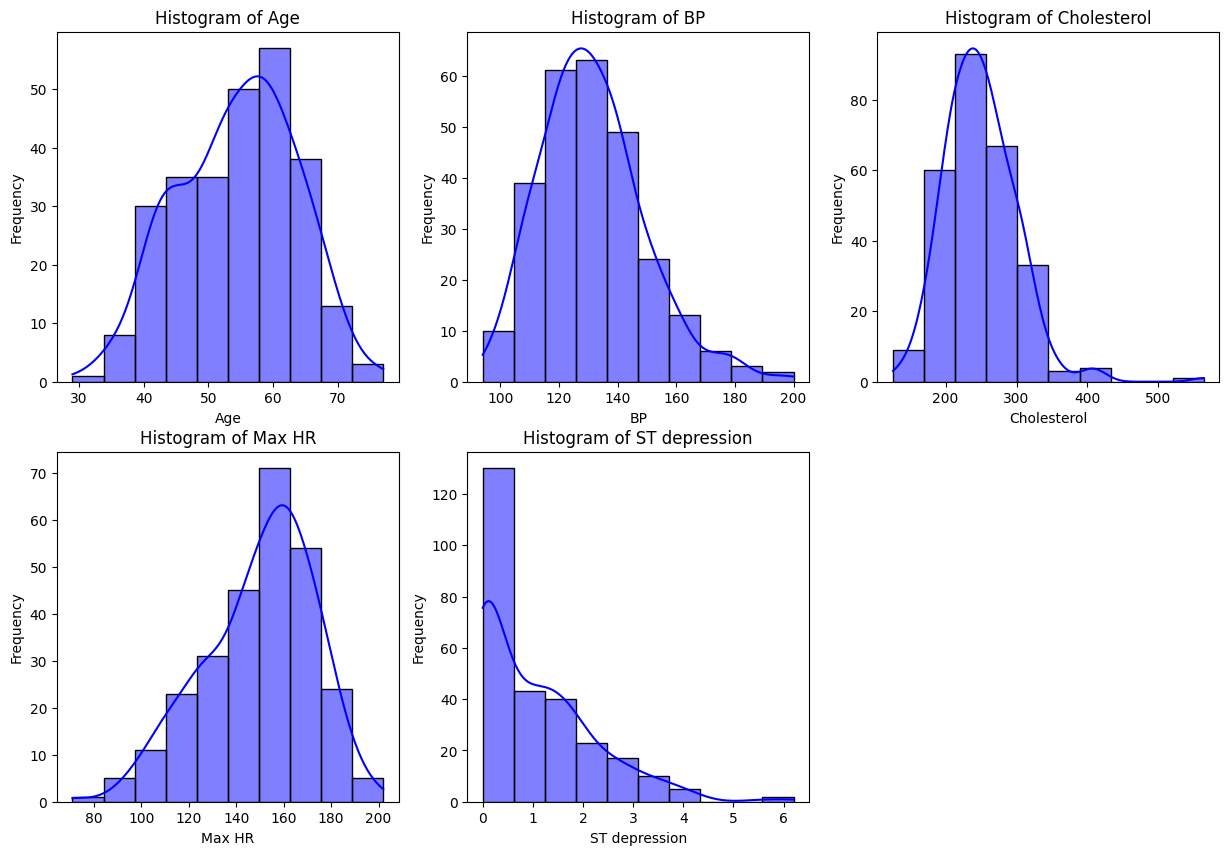

In [ ]:
# List of numerical columns to plot
num_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid for subplots
    sns.histplot(df[col], kde=True, bins=10, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.show()

- Most of the data cosist of middle aged people
- Most of the people have high Blood Pressure(BP) level, High Cholesterol and high Maximum Heart Rate  
- St depression showing right skewiness it is fine because average St depression of a healthy person is below 2. Most of them having Low ST depression means that the heart is likely functioning well at the time of measurement, even if there are other risk factors present. It’s possible that these individuals are not yet experiencing symptoms of heart disease.

#### <a id='toc1_5_1_2_'></a>[Box Plot](#toc0_)

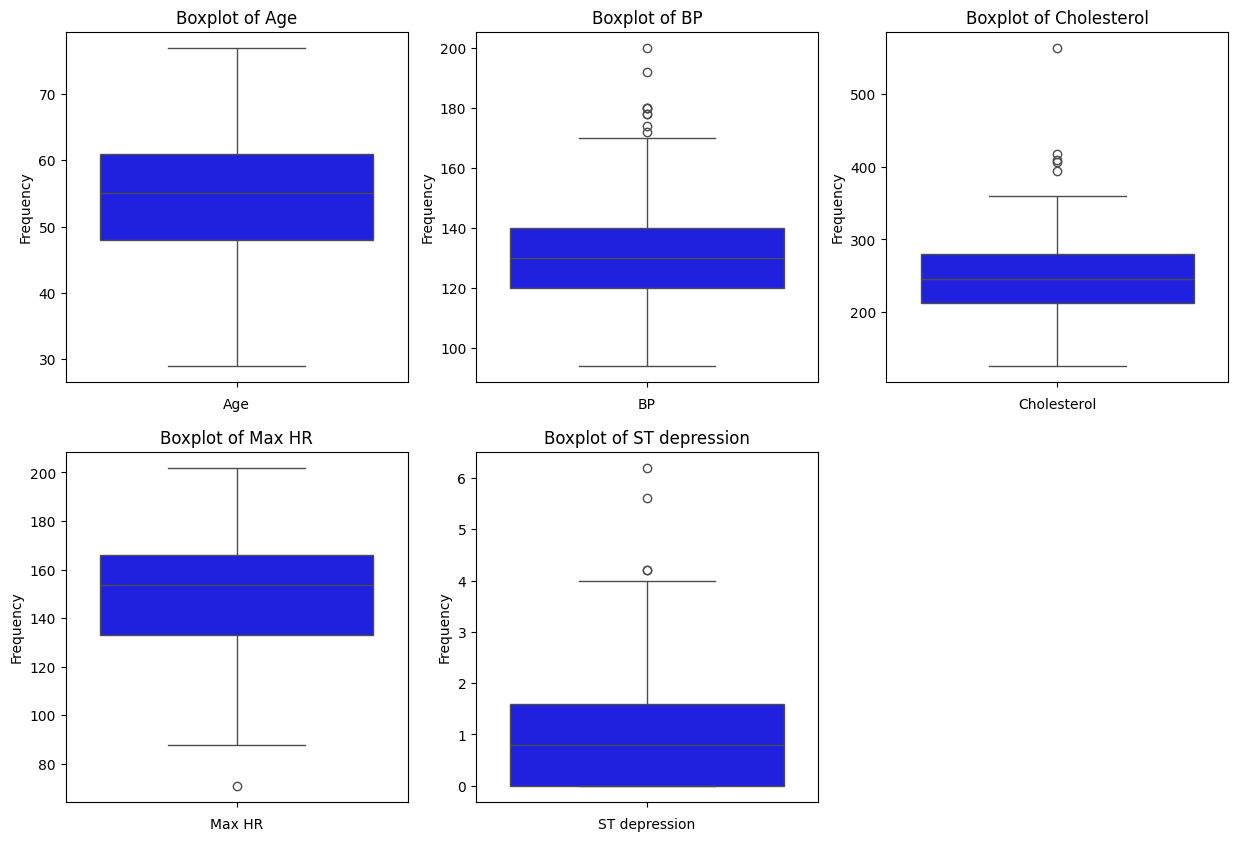

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # Create a 2x3 grid for subplots
    sns.boxplot(df[col], color='blue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.show()

From the plot we can able to see some outliers present but it is fine as we already discussed about it during outlier detection and treatment process

### <a id='toc1_5_2_'></a>[Bivariate Analysis](#toc0_)
#### <a id='toc1_5_2_1_'></a>[Count Plot ( categorical features vs Heart Disease)](#toc0_)

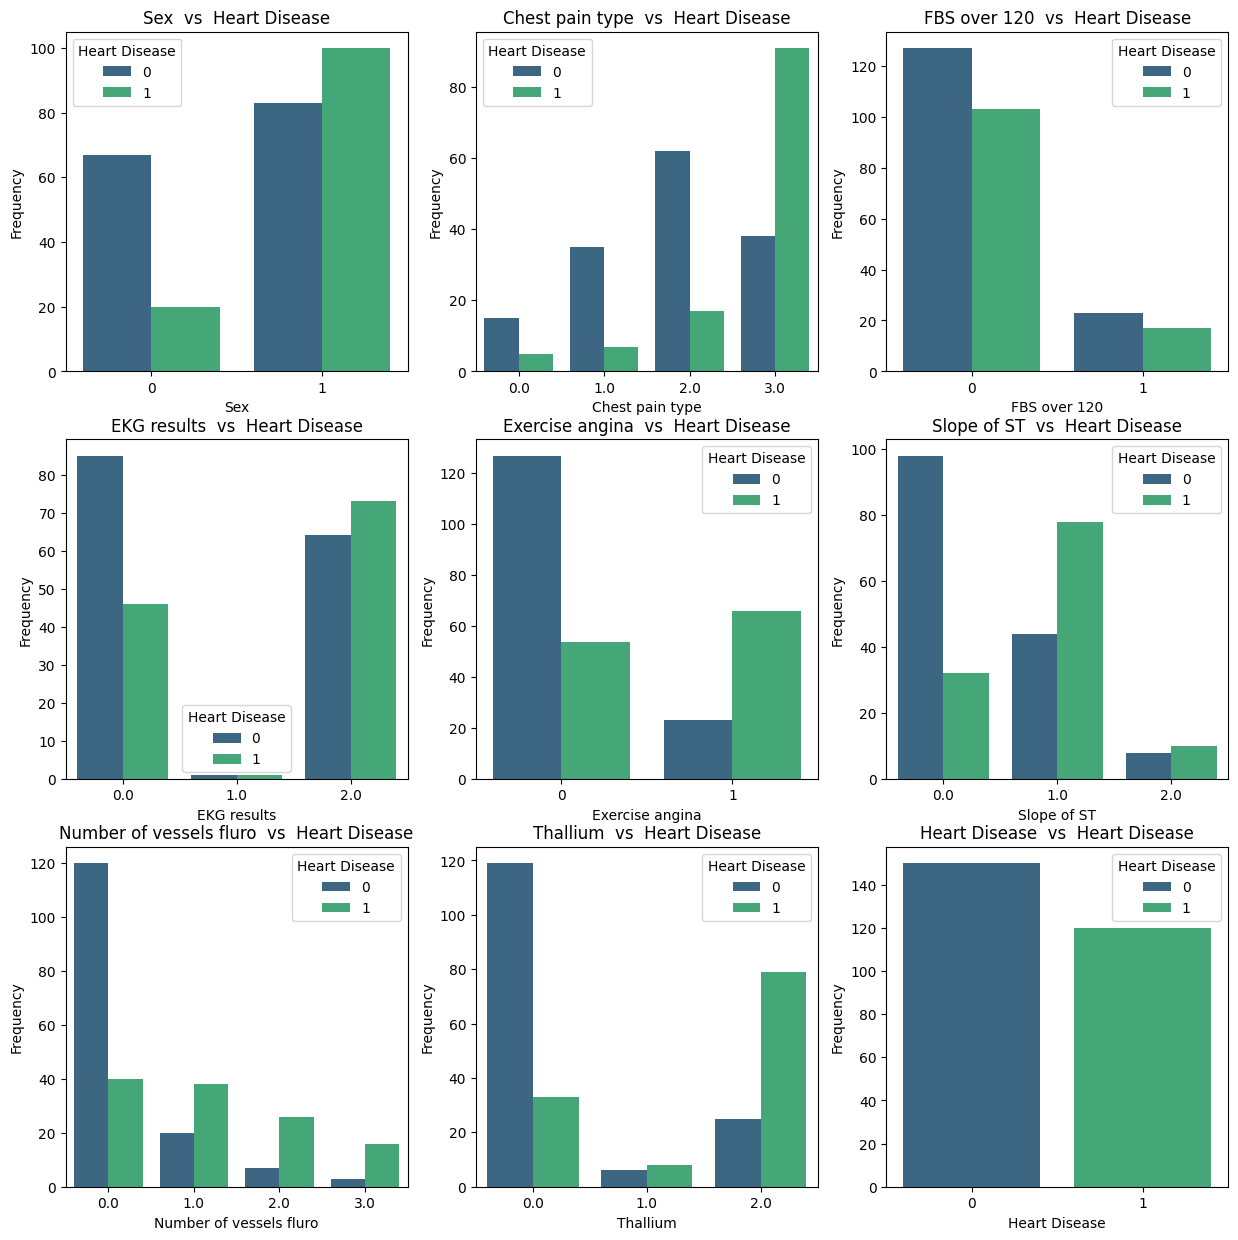

In [ ]:
# Calculate the number of rows and columns required for the subplots
num_col = len(cat_cols)
num_rows = (num_col // 3) + (1 if num_col % 3 != 0 else 0)  # Ensure enough rows to fit all plots

# Create a figure for the subplots
plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(num_rows, 3, i)  
    sns.countplot(x=df[col], hue=df['Heart Disease'], palette='viridis') 
    plt.title(f'{col}  vs  Heart Disease')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.show()

- Most individuals have **lower-risk health indicators** such as **no exercise-induced angina** and **zero vessels colored by fluoroscopy**. The majority also have the **highest chest pain type (type 4)**, which is notable for **potential risk** assessment
- Even though most of the people **FBS below 120** is **low many of them still have Heart Disease** so it suggest that **FBS below 120** is **not a important feature** to decide a person have **heart disease** or not.
- The dataset has a relatively **balanced distribution** between the presence and absence of heart disease, which is favorable for training a classification model

#### <a id='toc1_5_2_2_'></a>[Count Plot (categorical features vs Sex(Male/Female)](#toc0_)

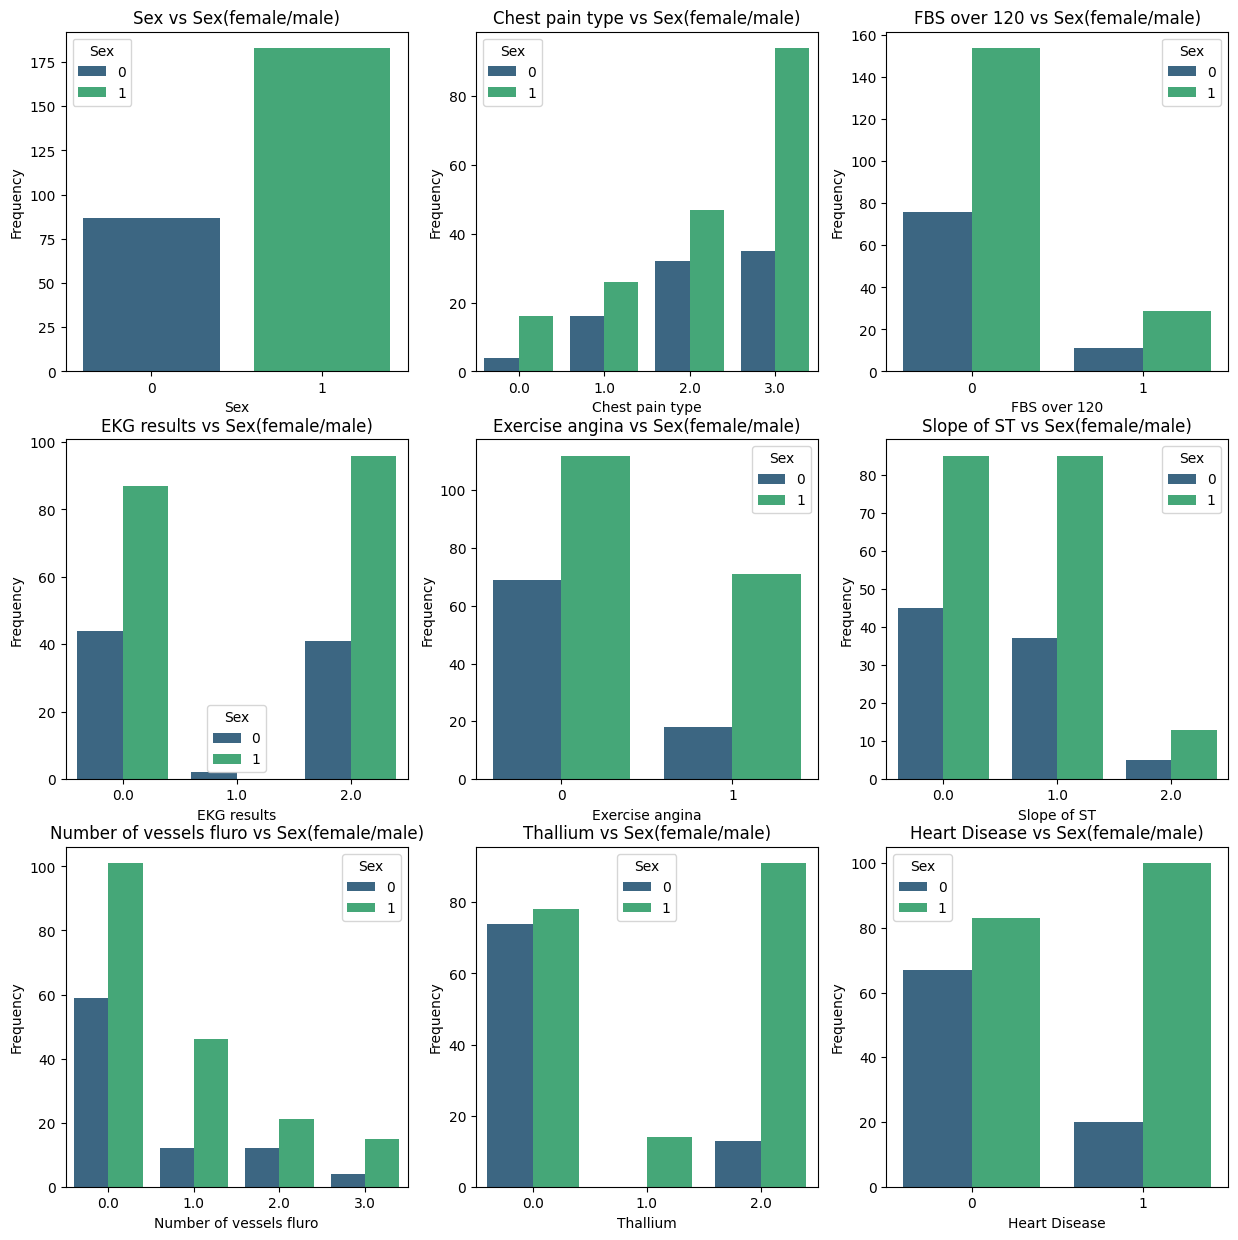

In [ ]:
# Calculate the number of rows and columns required for the subplots
num_col = len(cat_cols)
num_rows = (num_col // 3) + (1 if num_col % 3 != 0 else 0)  # Ensure enough rows to fit all plots

# Create a figure for the subplots
plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(num_rows, 3, i)  
    sns.countplot(x=df[col], hue=df['Sex'], palette='viridis') 
    plt.title(f'{col} vs Sex(female/male)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.show()

- It is clear that males are more vulnerable to Heart Disease
- Assumption - (male have higer hear disease) Due to work stress, Because on average men go for work to run the family wich naturally bring more stress which result in Heart Disease.

### <a id='toc1_5_3_'></a>[Multivariate Analysis](#toc0_)
#### <a id='toc1_5_3_1_'></a>[Correlation Matrix, Heatmaps](#toc0_)

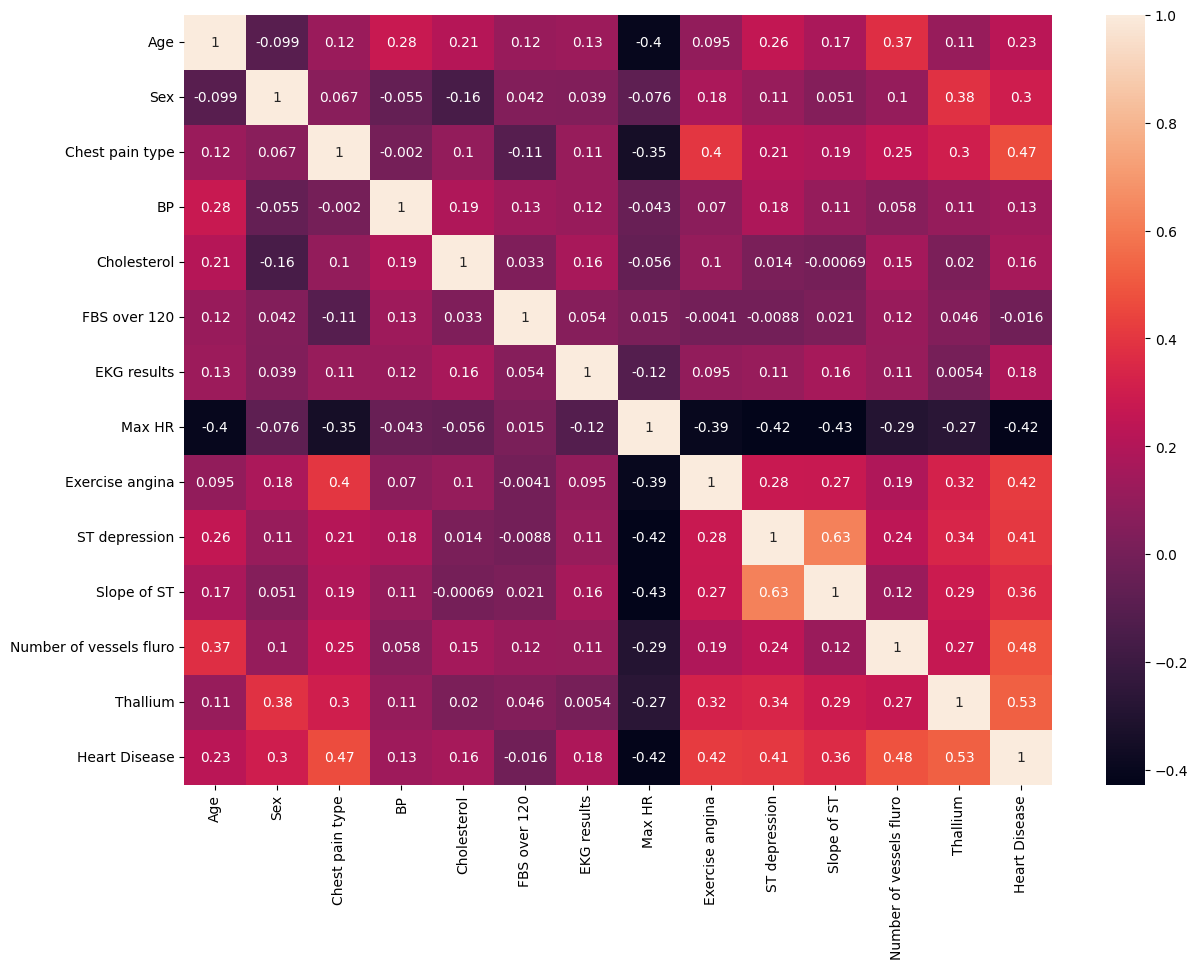

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(method = 'spearman'), annot=True)
plt.show()

- **Chest Pain Type** and **Heart Disease** - There is a moderate positive correlation (0.47) between chest pain type and heart disease, indicating that higher levels of chest pain are associated with a greater likelihood of heart disease.

## <a id='toc1_6_'></a>[Model Training and Evaluation](#toc0_)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Model training and hyperparameter tuning
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, log_loss, precision_score, recall_score


### <a id='toc1_6_1_'></a>[Splitting Data into Training and Testing Sets](#toc0_)

In [ ]:
# Splitting features and target
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Step 2: Define preprocessing
numeric_features = num_cols
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

### <a id='toc1_6_2_'></a>[Base model](#toc0_)

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score, f1_score

# Define the Logistic Regression model
model = LogisticRegression()

# Create a pipeline with preprocessing and classifier
base_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

# Define cross-validation strategy (StratifiedKFold for imbalanced datasets)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring functions for AUC-ROC and F1 score
scoring = {
    'AUC': make_scorer(roc_auc_score, needs_proba=True),
    'F1': make_scorer(f1_score)
}

# Perform cross-validation and calculate AUC-ROC and F1 scores
cv_results = cross_validate(base_model, X_train, y_train, cv=cv, scoring=scoring)

# Train the model on the entire training set
base_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'BP', 'Cholesterol',
                                                   'Max HR',
                                                   'ST depression'])])),
                ('classifier', LogisticRegression())])

In [ ]:
#list for storing cross validation result
cv_list = []
#list for storing test result
results_list = []

# Average cross-validation scores for AUC-ROC and F1
print('\nCross-Validation Results:')
print('---------------------------')
print(f"Average AUC-ROC: {cv_results['test_AUC'].mean():.4f}")
print(f"Average F1 Score: {cv_results['test_F1'].mean():.4f}")
                
# Predict the results on the test set
y_pred = base_model.predict(X_test)
y_proba = base_model.predict_proba(X_test)[:, 1] if hasattr(base_model, "predict_proba") else base_model.decision_function(X_test)

# Calculate AUC-ROC and F1 Score for test
auc_score = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

#append cv of base model to cv_list
cv_list.append(['logistic regression(base_model)', cv_results['test_F1'].mean(), cv_results['test_AUC'].mean()])
results_list.append(['logistic regression(base_model)', f1, auc_score, {}, acc])

# Print the performance of the current model on test 
print('\nTest Dataset :')
print('-----------------')
print(f"AUC-ROC: {auc_score:.4f}, \nF1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))


Cross-Validation Results:
---------------------------
Average AUC-ROC: 0.7528
Average F1 Score: 0.6447

Test Dataset :
-----------------
AUC-ROC: 0.8160, 
F1 Score: 0.7042
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        45
           1       0.71      0.69      0.70        36

    accuracy                           0.74        81
   macro avg       0.74      0.74      0.74        81
weighted avg       0.74      0.74      0.74        81



### <a id='toc1_6_3_'></a>[Hyperparameters Tuning](#toc0_)

In [ ]:
# models and hyperparameters
models = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(probability=True),
    'GaussianNB': GaussianNB(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

In [428]:
# Hyperparameters for models
hyperparameters = {
    'LogisticRegression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__class_weight' : ['balanced']
    },
    'KNN': {
        'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
        'classifier__metric': ['euclidean', 'manhattan']
    },
     "Decision Tree": {
        'classifier__max_depth': [3, 5, 7, None],
        'classifier__min_samples_split': [2, 5, 10]
     },
    "Random Forest": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 10, 20, 30, 40, None]
    },
    'SVC': {
        'classifier__C': [0.1, 1, 10], 
        'classifier__kernel': ['linear', 'rbf']
    },
    "Gradient Boosting": {
        'classifier__n_estimators': [50, 100, 150],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    'AdaBoost': {
        'classifier__n_estimators': [50, 100], 
        'classifier__learning_rate': [0.05, 0.1]
    }
}

In [429]:
from sklearn.metrics import roc_auc_score, f1_score, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd

for model_name, model in models.items():
    # Define the pipeline for the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

    # Define the hyperparameters for GridSearchCV
    param_grid = hyperparameters.get(model_name, {})
    
    # Apply GridSearchCV (optimize for AUC-ROC but calculate F1 score too)
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=['roc_auc', 'f1'], n_jobs=-1, refit='roc_auc')
    grid_search.fit(X_train, y_train)

    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Get cross-validation results for AUC-ROC and F1 scores
    auc_cv_scores = grid_search.cv_results_['mean_test_roc_auc'].mean()
    f1_cv_scores = grid_search.cv_results_['mean_test_f1'].mean()
    cv_list.append([model_name, f1_cv_scores, auc_cv_scores])
    
    # Predict the results on the test set
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else best_model.decision_function(X_test)
    
    # Calculate AUC-ROC and F1 Score for test
    auc_score = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    # Store the results including both AUC and F1 score from GridSearchCV
    results_list.append([model_name, f1, auc_score, grid_search.best_params_, acc])
    
    print(f"\nRunning GridSearchCV for {model_name}... with parameter {param_grid}")
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    
    # Print the performance of the current model on train
    print('\nTrain Dataset (Cross-Validation Result) :')
    print('-----------------')
    print(f"Average AUC-ROC score: {auc_cv_scores:.4f}, \nAverage F1 Score: {f1_cv_scores:.4f}")
    
    # Print the performance of the current model on test 
    print('\nTest Dataset :')
    print('-----------------')
    print(f"AUC-ROC: {auc_score:.4f}, \nF1 Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))

    print('---------------------------------------------------------------------')
    
# Create a DataFrame from the results list
cv_dataframe = pd.DataFrame(cv_list, columns=['Model Used', 'F1 Train', 'AUC ROC Train'])
result_dataframe = pd.DataFrame(results_list, columns=['Model Used', 'F1 Score', 'AUC-ROC Score', 'Best Hyperparameters', 'Accuracy'])



Running GridSearchCV for LogisticRegression... with parameter {'classifier__C': [0.1, 1, 10], 'classifier__class_weight': ['balanced']}
Best parameters for LogisticRegression: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced'}

Train Dataset (Cross-Validation Result) :
-----------------
Average AUC-ROC score: 0.7756, 
Average F1 Score: 0.6795

Test Dataset :
-----------------
AUC-ROC: 0.8179, 
F1 Score: 0.6849
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        45
           1       0.68      0.69      0.68        36

    accuracy                           0.72        81
   macro avg       0.71      0.71      0.71        81
weighted avg       0.72      0.72      0.72        81

---------------------------------------------------------------------

Running GridSearchCV for KNN... with parameter {'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7], 'classifier__metric': ['euclidean', 'manhattan']}
Best parameters for KNN: {'

In [430]:
# Display the cv dataframe 
cv_dataframe.set_index('Model Used')

,F1 Train,AUC ROC Train
Model Used,,
logistic regression(base_model),0.644662,0.752836
LogisticRegression,0.679537,0.775642
KNN,0.554092,0.688580
DecisionTree,0.544517,0.583053
RandomForest,0.655802,0.747637
SVC,0.577395,0.748985
GaussianNB,0.649836,0.761765
GradientBoosting,0.628844,0.673529
AdaBoost,0.595775,0.724024


Here you can see some models f1 score are very low lets check test result

In [431]:
# Display the result dataframe
result_dataframe.set_index('Model Used')

,F1 Score,AUC-ROC Score,Best Hyperparameters,Accuracy
Model Used,,,,
logistic regression(base_model),0.704225,0.816049,{},0.740741
LogisticRegression,0.684932,0.817901,"{'classifier__C': 0.1, 'classifier__class_weight': 'balanced'}",0.716049
KNN,0.721311,0.829321,"{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 6}",0.790123
DecisionTree,0.591549,0.636111,{},0.641975
RandomForest,0.626866,0.762963,{},0.691358
SVC,0.735294,0.810494,"{'classifier__C': 0.1, 'classifier__kernel': 'linear'}",0.777778
GaussianNB,0.695652,0.826543,{},0.740741
GradientBoosting,0.619718,0.741358,{},0.666667
AdaBoost,0.687500,0.796296,"{'classifier__learning_rate': 0.05, 'classifier__n_estimators': 100}",0.753086


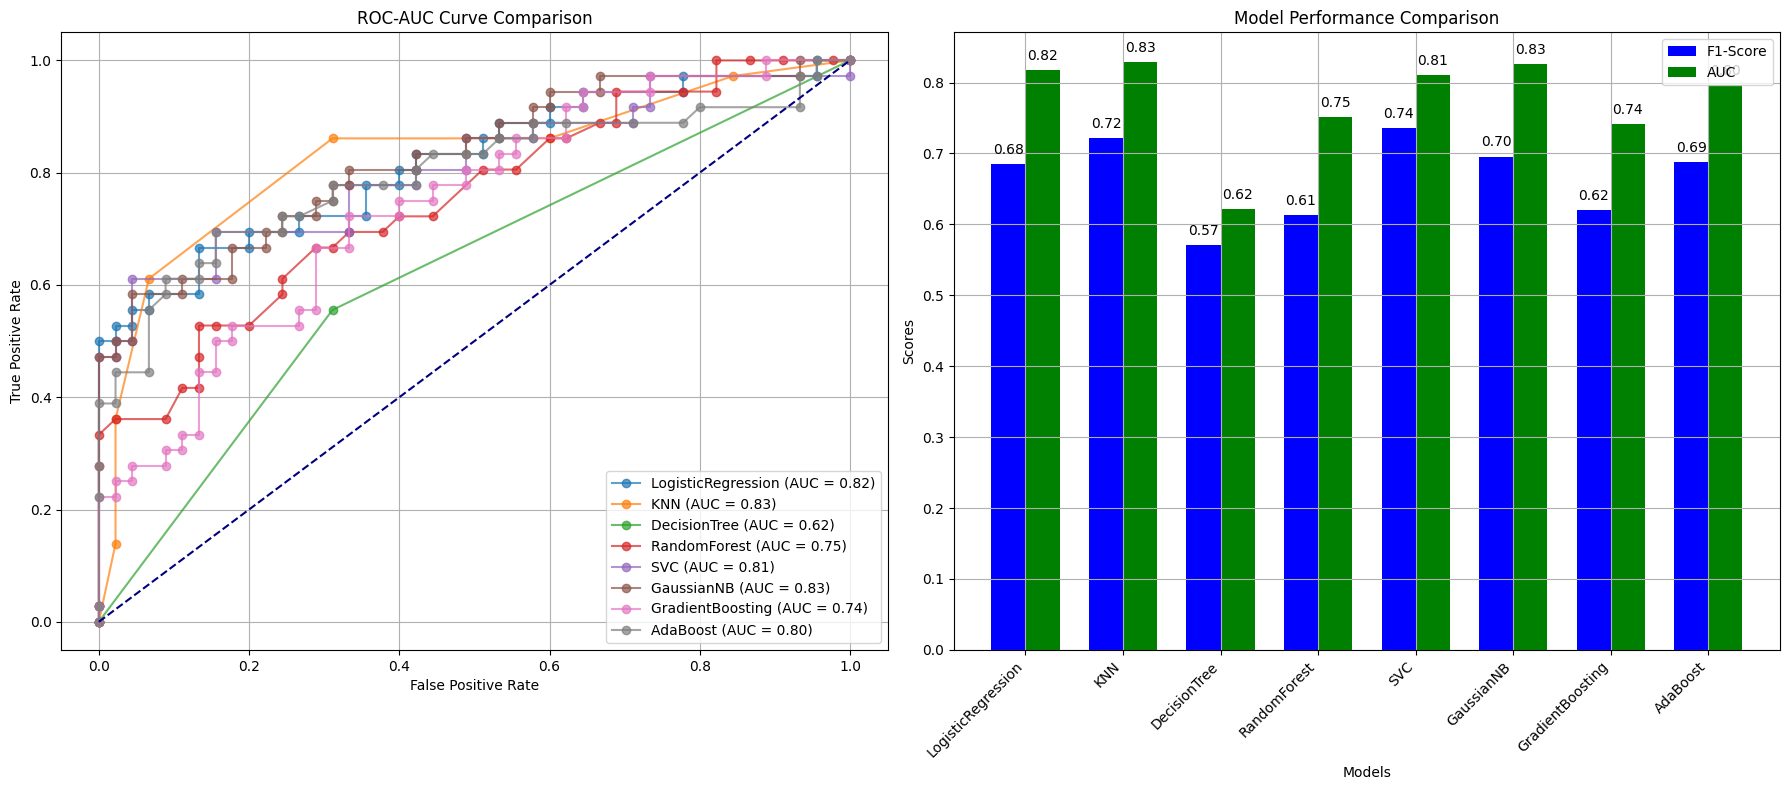

In [432]:
#visualisation
temp = result_dataframe
temp_result = results_list
results_list.pop(0)
result_dataframe  = result_dataframe.drop(0)
result_dataframe.reset_index(drop=True, inplace=True)
result_dataframe

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, f1_score

# Step 1: Initialize the figure
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Prepare lists for storing model performance metrics
model_names = []
f1_scores = []
auc_scores = []

# Step 2: Loop through models to plot ROC curve and collect performance metrics
for model_name, result in zip(result_dataframe['Model Used'], results_list):
    # Extract the model from GridSearchCV
    best_params = result[3]  # Extract the best hyperparameters
    best_model = models[model_name].set_params(**{k.split('__')[1]: v for k, v in best_params.items()})
    best_model.fit(preprocessor.transform(X_train), y_train)  # Fit the model manually

    # Predict probabilities or decision scores
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(preprocessor.transform(X_test))[:, 1]
    elif hasattr(best_model, "decision_function"):
        y_proba = best_model.decision_function(preprocessor.transform(X_test))
    else:
        continue  # Skip models without `predict_proba` or `decision_function`

    # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve with different line styles for better distinction
    ax[0].plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})", linestyle='-', marker='o', alpha=0.7)
    
    # Calculate F1-Score
    y_pred = best_model.predict(preprocessor.transform(X_test))
    f1 = f1_score(y_test, y_pred)
    
    # Store model name, F1-score, and AUC
    model_names.append(model_name)
    f1_scores.append(f1)
    auc_scores.append(roc_auc)

# Step 3: Plot diagonal line representing random guessing (ROC curve)
ax[0].plot([0, 1], [0, 1], color="navy", linestyle="--")

# Step 4: Add plot aesthetics for ROC curve
ax[0].set_title("ROC-AUC Curve Comparison")
ax[0].set_xlabel("False Positive Rate")
ax[0].set_ylabel("True Positive Rate")
ax[0].legend(loc="lower right")
ax[0].grid()

# Step 5: Bar plot for F1-Score and AUC
bar_width = 0.35
index = np.arange(len(model_names))

# Create a bar plot for F1-Score and AUC
bar_f1 = ax[1].bar(index, f1_scores, bar_width, label="F1-Score", color='b')
bar_auc = ax[1].bar(index + bar_width, auc_scores, bar_width, label="AUC", color='g')

# Annotate all bars with their respective F1-Score and AUC values
for i in range(len(model_names)):
    ax[1].text(i, f1_scores[i] + 0.01, f'{f1_scores[i]:.2f}', ha='center', va='bottom', fontsize=10, color='black')
    ax[1].text(i + bar_width, auc_scores[i] + 0.01, f'{auc_scores[i]:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Step 6: Add plot aesthetics for bar plot
ax[1].set_title("Model Performance Comparison")
ax[1].set_xlabel("Models")
ax[1].set_ylabel("Scores")
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels(model_names, rotation=45, ha='right')
ax[1].legend()
ax[1].grid()

# Step 7: Show both plots
plt.tight_layout()
plt.show()
result_dataframe = temp
results_list = temp_result

- From the figure we can see that LogisticRegression, KNN, SVC, GaussianNB and AdaBoost performs better on both auc-roc and f1 score.
- Even though some model performed poorly on crossvalidation now they are performing well on the new test data.
- Lets create a new overall score to evaluate both cross validation and test performance of the models.   

### <a id='toc1_6_4_'></a>[ Evaluating Model Performance on Test Data](#toc0_)

new evalution metric to score best model 
- name : overall_score 
- formula : 
- overall_score = (F1_test * 0.6 + AUC-ROC_test * 0.6 + F1_train * 0.4 + AUC-ROC_train * 0.4) / 2 * 10)
  


In [433]:
overall_result_df = pd.DataFrame(cv_dataframe['Model Used'], columns = ['Model Used'])
overall_result_df['Best Hyperparameters'] = result_dataframe['Best Hyperparameters']
#code for new overall_score formula 
overall_result_df['overall_score'] = round((((result_dataframe['F1 Score']*0.6) + (result_dataframe['AUC-ROC Score']*0.6)+
                                    (cv_dataframe['F1 Train']*0.4) + (cv_dataframe['AUC ROC Train']*0.4))/2 * 10),2)
overall_result_df.sort_values('overall_score', ascending=False).set_index('Model Used')

,Best Hyperparameters,overall_score
Model Used,,
LogisticRegression,"{'classifier__C': 0.1, 'classifier__class_weight': 'balanced'}",7.42
GaussianNB,{},7.39
logistic regression(base_model),{},7.36
SVC,"{'classifier__C': 0.1, 'classifier__kernel': 'linear'}",7.29
KNN,"{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 6}",7.14
AdaBoost,"{'classifier__learning_rate': 0.05, 'classifier__n_estimators': 100}",7.09
RandomForest,{},6.98
GradientBoosting,{},6.69
DecisionTree,{},5.94


- In overall score **logisticRegression hyperparameter tuned model** performed well with overall score of **7.42** 
- when we compare it with Base Model **Logistic Regression** with overall score of **7.36** as the **difference is not huge** so we can **use** the base model as it is **simpler**.

**MODEL SELECTED : base_model ---> LogistcRegression()**

## <a id='toc1_7_'></a>[Feature Engineering](#toc0_)
To find important feature we use 
- logistic regression model to get coeffiecent
- Recursive feature elimination (RFE) 

### <a id='toc1_7_1_'></a>[Feature selection using Logistic regression](#toc0_)

In [ ]:
import numpy as np
import pandas as pd

# Extract the trained Logistic Regression model from the pipeline
log_reg_model = base_model.named_steps['classifier']

# Get the feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Get the absolute coefficients
feature_importance = np.abs(log_reg_model.coef_).flatten()

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
feature_importance_df


,Feature,Importance
3,num__Max HR,0.771120
4,num__ST depression,0.682692
2,num__Cholesterol,0.189208
1,num__BP,0.070151
0,num__Age,0.062893


### <a id='toc1_7_2_'></a>[Recursive feature elimination (RFE) to find important features](#toc0_)

In [ ]:
from sklearn.feature_selection import RFE
# Step 4: Initialize Logistic Regression model
model = LogisticRegression(max_iter=10000)

# Step 5: Initialize RFE with the Logistic Regression model
selector = RFE(estimator=model, n_features_to_select=6)  # Number of features to select
selector = selector.fit(X_train, y_train)

# Step 6: Check the results
selected_features = X_train.columns[selector.support_]  # Features selected by RFE
print("Selected Features:", selected_features)

# You can also check the ranking of the features
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': selector.ranking_
}).sort_values('Ranking')
print(feature_ranking)

# Step 7: Fit a logistic regression model on the selected features
X_train_selected = X_train[selected_features]
model.fit(X_train_selected, y_train)

# Step 8: Evaluate the model on the test set
X_test_selected = X_test[selected_features]
score = model.score(X_test_selected, y_test)
print(f"Model accuracy with selected features: {score:.2f}")

Selected Features: Index(['Sex', 'Chest pain type', 'Exercise angina', 'Slope of ST',
       'Number of vessels fluro', 'Thallium'],
      dtype='object')
                    Feature  Ranking
1                       Sex        1
2           Chest pain type        1
8           Exercise angina        1
10              Slope of ST        1
11  Number of vessels fluro        1
12                 Thallium        1
5              FBS over 120        2
9             ST depression        3
6               EKG results        4
3                        BP        5
7                    Max HR        6
0                       Age        7
4               Cholesterol        8
Model accuracy with selected features: 0.85


**Logistic Regression Feature Importance Results :**
**Max Heart Rate (HR), ST Depression, BP, Age** and **Cholesterol** were the top features.
But Sex, Chest Pain Type, and Exercise Angina were missing, even though they seem medically significant.

**RFE Results :** 
Selected **Sex, Chest Pain, Exercise Angina, Slope of ST, Number of Vessels** and **Thallium**.
Max HR, ST Depression, and Cholesterol were ranked lower, meaning RFE considers them less useful when combined with others.

Here you can see the two feature selection method showing different result so,
Now train **two models**, one with features selected by **RFE** and one with those selected by **Logistic Regression**
- If RFE’s model performs better → Use RFE-selected features.
- If Logistic Regression’s feature set performs better → Keep those features.
- If both have similar performance, prefer RFE because it removes redundant features.

### <a id='toc1_7_3_'></a>[Model building with new selected feature](#toc0_)

#### <a id='toc1_7_3_1_'></a>[Feature selected from model coefficent](#toc0_)

In [ ]:
result = []

# Splitting features and target
X = df[['Max HR', 'ST depression', 'Cholesterol', 'BP', 'Age']]
y = df['Heart Disease']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Define preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])


# Train the Logistic Regression model
logistic_model = LogisticRegression()
base_model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logistic_model)])
base_model.fit(X_train, y_train)
# Define cross-validation strategy (StratifiedKFold for imbalanced datasets)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring functions for AUC-ROC and F1 score
scoring = {
    'AUC': make_scorer(roc_auc_score, needs_proba=True),
    'F1': make_scorer(f1_score)
}

# Perform cross-validation and calculate AUC-ROC and F1 scores
cv_results = cross_validate(base_model, X_train, y_train, cv=cv, scoring=scoring)

# Average cross-validation scores for AUC-ROC and F1
print('\nCross-Validation Training Results:')
print('---------------------------')
print(f"AUC-ROC train: {cv_results['test_AUC'].mean():.4f}")
print(f"F1 Train: {cv_results['test_F1'].mean():.4f}")

# Predict the results on the test set
y_pred = base_model.predict(X_test)
y_proba = base_model.predict_proba(X_test)[:, 1] if hasattr(base_model, "predict_proba") else base_model.decision_function(X_test)

# Calculate AUC-ROC and F1 Score for test
auc_score = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)

result.append(['Logistic regression', X.columns, cv_results['test_F1'].mean(), f1, cv_results['test_AUC'].mean(), auc_score])

# Print the performance of the current model on test 
print('\nTest Dataset :')
print('-----------------')
print(f"AUC-ROC: {auc_score:.4f}, \nF1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))


Cross-Validation Training Results:
---------------------------
AUC-ROC train: 0.7528
F1 Train: 0.6447

Test Dataset :
-----------------
AUC-ROC: 0.8160, 
F1 Score: 0.7042
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        45
           1       0.71      0.69      0.70        36

    accuracy                           0.74        81
   macro avg       0.74      0.74      0.74        81
weighted avg       0.74      0.74      0.74        81



#### <a id='toc1_7_3_2_'></a>[Feature selected from Recursive feature elimination](#toc0_)

In [ ]:
# Splitting features and target
X = df[['Sex', 'Chest pain type', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']]
y = df['Heart Disease']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Define preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])


# Train the Logistic Regression model
logistic_model = LogisticRegression()
base_model_rfe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logistic_model)])
base_model_rfe.fit(X_train, y_train)

# Define cross-validation strategy (StratifiedKFold for imbalanced datasets)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring functions for AUC-ROC and F1 score
scoring = {
    'AUC': make_scorer(roc_auc_score, needs_proba=True),
    'F1': make_scorer(f1_score)
}

# Perform cross-validation and calculate AUC-ROC and F1 scores
cv_results = cross_validate(base_model_rfe, X_train, y_train, cv=cv, scoring=scoring)

# Average cross-validation scores for AUC-ROC and F1
print('\nCross-Validation Training Results:')
print('---------------------------')
print(f"AUC-ROC train: {cv_results['test_AUC'].mean():.4f}")
print(f"F1 Train: {cv_results['test_F1'].mean():.4f}")

# Predict the results on the test set
y_pred = base_model_rfe.predict(X_test)
y_proba = base_model_rfe.predict_proba(X_test)[:, 1] if hasattr(base_model_rfe, "predict_proba") else base_model_rfe.decision_function(X_test)

# Calculate AUC-ROC and F1 Score for test
auc_score = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)

result.append(['Logistic regression', X.columns, cv_results['test_F1'].mean(), f1, cv_results['test_AUC'].mean(), auc_score])

# Print the performance of the current model on test 
print('\nTest Dataset :')
print('-----------------')
print(f"AUC-ROC: {auc_score:.4f}, \nF1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))


Cross-Validation Training Results:
---------------------------
AUC-ROC train: 0.8986
F1 Train: 0.7817

Test Dataset :
-----------------
AUC-ROC: 0.8981, 
F1 Score: 0.8101
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        45
           1       0.74      0.89      0.81        36

    accuracy                           0.81        81
   macro avg       0.82      0.82      0.81        81
weighted avg       0.83      0.81      0.82        81



In [ ]:
result_df = pd.DataFrame(result, columns=['Model Used', 'Features used', 'F1 Train', 'F1 Test', 'AUC-ROC Train', 'AUC-ROC Test']) 
result_df['overall_score'] = round((((result_df['F1 Test']*0.6) + (result_df['AUC-ROC Test']*0.6)+
                                    (result_df['F1 Train']*0.4) + (result_df['AUC-ROC Train']*0.4))/2 * 10),2)
result_df

,Model Used,Features used,F1 Train,F1 Test,AUC-ROC Train,AUC-ROC Test,overall_score
0,Logistic regression,"Index(['Max HR', 'ST depression', 'Cholesterol', 'BP', 'Age'], dtype='object')",0.644662,0.704225,0.752836,0.816049,7.36
1,Logistic regression,"Index(['Sex', 'Chest pain type', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium'], dtype='object')",0.781664,0.810127,0.898564,0.898148,8.49


## <a id='toc1_8_'></a>[Final Model Selection](#toc0_)
Since the second model has:
- Higher F1-score (better balance between precision and recall)
- Higher AUC-ROC (better at distinguishing between heart disease and non-heart disease patients)
- Better generalization on test data

We select the **Logistic Regression model trained with RFE-selected features as the final model.**

In [ ]:
final_model = base_model_rfe

## <a id='toc1_9_'></a>[Saving and Loading Model](#toc0_)

In [ ]:
# Save the trained model using joblib
joblib.dump(final_model, "heart_disease_model.pkl")
print("Model saved as 'heart_disease_model.pkl'")

# Save feature names
feature_metadata = {
    "feature_names": ['Sex', 'Chest pain type', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
}
with open("model_metadata.json", "w") as f:
    json.dump(feature_metadata, f)

print("Metadata saved as 'model_metadata.json'")

Model saved as 'heart_disease_model.pkl'
Metadata saved as 'model_metadata.json'


In [441]:
with open("model_metadata.json", "r") as f:
    metadata = json.load(f)
print("Expected feature names:", metadata["feature_names"])

Expected feature names: ['Sex', 'Chest pain type', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


In [442]:
# Load the model
loaded_model = joblib.load("heart_disease_model.pkl")
print("Model loaded successfully")

Model loaded successfully


In [ ]:
# Example raw data (replace with actual values for prediction)
example_data = [[ 0, 1, 1, 0, 2, 1]]

# Ensure the input data is a DataFrame with the same columns as the training data
columns = metadata["feature_names"]
example_df = pd.DataFrame(example_data, columns=columns)

# Use the loaded model to make predictions
prediction = loaded_model.predict(example_df)  # Preprocessing is handled automatically
probability = loaded_model.predict_proba(example_df)

# Display probabilities for clarity
prob_class_0 = probability[0][0] * 100
prob_class_1 = probability[0][1] * 100

# Display the prediction
if prediction[0] == 1:
    print("The person is likely to have heart disease.")
    print(f"Probability of heart disease (class 1): {prob_class_1:.2f} %")
else:
    print("The person is unlikely to have heart disease.")
    print(f"Probability of no heart disease (class 0): {prob_class_0:.2f} %")

The person is unlikely to have heart disease.
Probability of no heart disease (class 0): 50.42 %


## <a id='toc1_10_'></a>[Conclusion & Impact](#toc0_)
In this project, we developed a machine learning model to predict the likelihood of heart disease using various patient health indicators. Through our analysis, we found that different feature selection methods provided different insights:

- Logistic Regression Coefficients helped identify the most influential risk factors for heart disease, which are useful for medical advice. Key features such as Max Heart Rate, ST Depression, Cholesterol, Blood Pressure, and Age provide actionable insights for patients and doctors.
- Recursive Feature Elimination (RFE) selected features that optimized model performance. This method resulted in a more compact and efficient model by selecting features such as Sex, Chest Pain Type, Exercise Angina, Slope of ST, Number of Vessels Fluro, and Thallium Test.
---
### <a id='toc1_10_1_'></a>[Recommendation for Doctors](#toc0_)
However, when providing medical advice, doctors should focus on the most influential risk factors identified by Logistic Regression.

**Key Features to Discuss with Patients :**
- **Max Heart Rate (HR):** Encourage regular cardiovascular exercise but advise against exceeding safe limits.
- **ST Depression:** Suggest stress tests or further evaluation if abnormalities are present.
- **Cholesterol:** Emphasize the importance of a heart-healthy diet and regular cholesterol checks.
- **Blood Pressure (BP):** Advise maintaining healthy blood pressure through diet, exercise, and possibly medication.
- **Age:** Discuss age-related risks and the importance of regular health check-ups.

**Why Not Use RFE Features for Advice?**

While RFE selects features that **improve model accuracy**, it doesn't provide insight into **how these features impact risk** individually. RFE is more about optimizing the model rather than understanding risk factors.

---
- Use RFE features(ex, Chest Pain Type, Exercise Angina, Slope of ST, Number of Vessels Fluro, and Thallium) when make prediction with models.
- Use Logistic Regression Coefficients for educational discussions with patients, as they offer clear, interpretable risk factors.

Ultimately, this project can assist doctors in identifying high-risk patients early and guiding them toward preventive measures. The model, when deployed on a website, will allow for easy accessibility and quick predictions, making it a valuable tool in the fight against heart disease.